In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random
import time
from pathlib import Path

import cv2 as cv
import numpy as np
import json

import matplotlib.pyplot as plt

from collections import OrderedDict

from datagen.imgen.ops import boxes_ops
from datagen.imgen import transforms
from datagen.imgen.content import utils as content_utils
from datagen.config import data_config
from datagen.imgen.io import fop

from tqdm import tqdm

from datagen.imgen.idcard import combiner 

In [25]:
#declare parameter
bg_path = '/data/idcard/source/background/clean/'
idcard_path = '/data/idcard/results/base/base1k/'
dst_path = '/data/idcard/'
idcard_ext="png" 
bg_ext="jpg|png"
bg_size = "1024x750"
angle: int = 30
shear: float = 0.5
scale_ratio: str = "0.5,0.9"
num_generated: int = 6

In [26]:
bg_data, bg_path = combiner.clean_background_data(bg_path, bg_ext)
idcard_image_data, idcard_json_data = combiner.clean_idcard_data(idcard_path, image_ext=idcard_ext)
bg_size = combiner.clean_background_size(bg_size)
dst_path, base_path = combiner.clean_destination_path(dst_path)

augment_param = combiner.clean_augment_param(angle, shear, scale_ratio, num_generated)
angle, shear, scale_ratio, num_generated  = augment_param

bg_data = combiner.bg_data_balancer(bg_data, idcard_image_data)

Logs: Loading 1988 data from /data/idcard/source/background/clean as background
Logs: Loading 1000 data from /data/idcard/results/base/base1k as IDCard
Logs: Preparing destination directory at /data/idcard
Logs: Creating directory recursively
Info: angle=30 shear_factor=0.5 scale_ratio=[0.5, 0.6, 0.7, 0.7999999999999999]


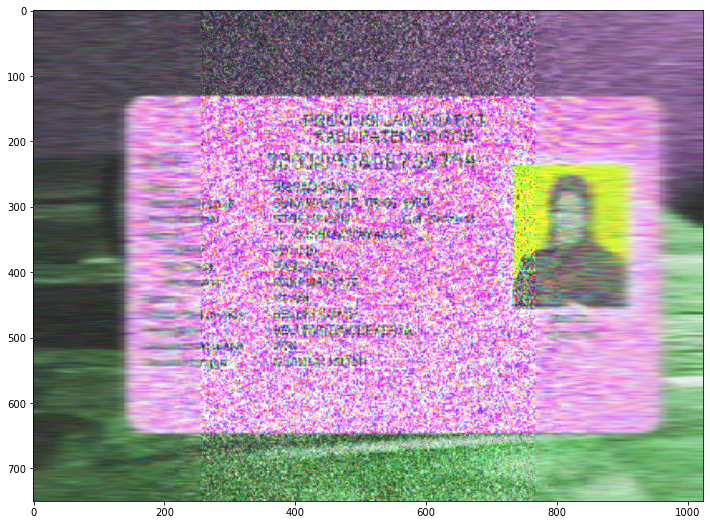

CPU times: user 1.36 s, sys: 32.9 ms, total: 1.4 s
Wall time: 769 ms


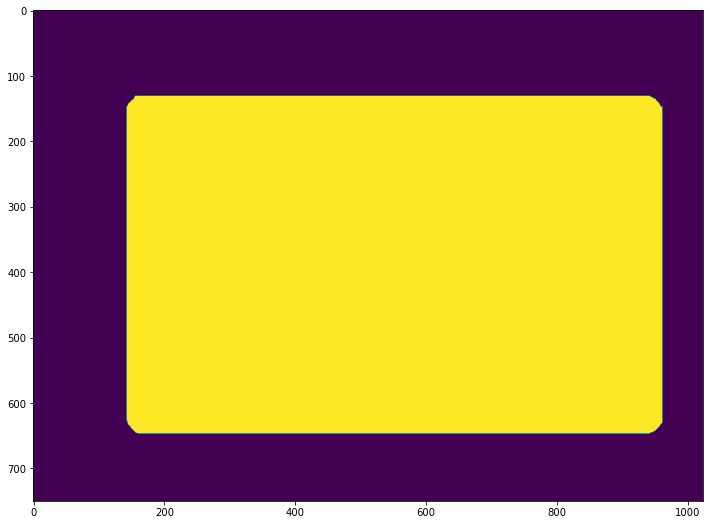

In [29]:
%%time
idx = random.randint(0, len(bg_data))
bgfile, idfile, jsfile = bg_data[idx], idcard_image_data[idx], idcard_json_data[idx]
comb_data = combiner.combine_single(bgfile, idfile, jsfile, base_path, bg_size, scale_ratio, angle, shear)
     
plt.figure(figsize=(12,12))
plt.imshow(cv.cvtColor(comb_data['image_data'], cv.COLOR_BGR2RGB), cmap='gray');plt.show()

plt.figure(figsize=(12,12))
plt.imshow(comb_data['mask_data'])

hasil analisa sementara
1. effect tangan yang memegang KTP harus dibuat
2. effect shadow masih bermasalah, karena effect nya masih belum menyerupai effect shadow saat di foto
3. effect ktp tua dan rusak perlu dibuat, karena ktp tua dan rusak harus di serupakan
4. posisi teks dan foto harus di random juga, untuk menciptakan kondisi text yang tidak beraturan
5. foto ktp perlu di tambah, untuk yang laki - laki maupun perempuan, unutk menambah variant foto nya, karena ada masalah juga di bagian ini


1. Create Hand Effect (hard complexity)
2. Fix or Create new Shadow Effect (medium complexity) (fix)
3. Old Document Effect (medium complexity)
4. Broken Document Effect (Noise Effect) (fix)
5. Randomize text position (medium complexity)
6. Randomize Picture Position (medium complexity)
7. Add more face for ktp (easy) (fix) 


In [8]:
random.uniform(1,2)

1.564880446868961

In [9]:
a = (1,2)
random.uniform(*a)

1.1872094712294723

In [112]:
random.choice([1,2,3])

3